In [ ]:
! pip install deepchem
! pip install propy3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 30.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.3/290.3 KB 2.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the data
import pandas as pd
data = pd.read_csv("/content/drive/Shareddrives/2:1 Caitlin & Kimai/Data/Enzyme Stability Prediction/train.csv")
data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [ ]:
data.shape

(31390, 5)

In [ ]:
#getting the length of the protein sequences
data['length'] = data['protein_sequence'].str.len()

print("Maximum length is: {}".format(data['length'].max()))
print("Minimum length is: {}".format(data['length'].min()))

Maximum length is: 32767
Minimum length is: 5


In [ ]:
data.head()

,seq_id,protein_sequence,pH,data_source,tm,length
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451


<Figure size 432x432 with 0 Axes>

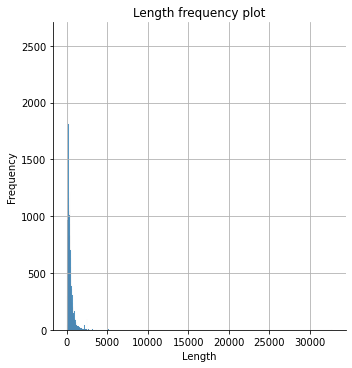

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6,6))
sns.displot(data = data, x = 'length')
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Length frequency plot")
plt.grid(True)
plt.show()

In [ ]:
data = data[data['length'] < 5000]

<Figure size 432x432 with 0 Axes>

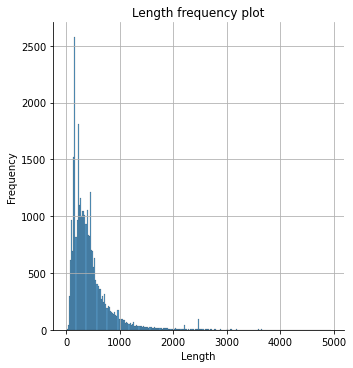

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6,6))
sns.displot(data = data, x = 'length')
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Length frequency plot")
plt.grid(True)
plt.show()

In [ ]:
data = data[data['length'] < 1000]

<Figure size 432x432 with 0 Axes>

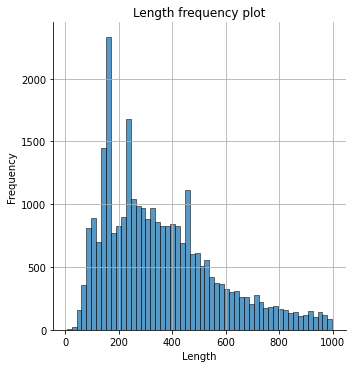

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6,6))
sns.displot(data = data, x = 'length')
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Length frequency plot")
plt.grid(True)
plt.show()

In [ ]:
data = data[data['length'] <= 400]

## Pre-processing

- Here we use a OneHotFeaturizer in order to convert protein sequences in numeric arrays

In [ ]:
import deepchem as dc
import tensorflow as tf

In [ ]:
max_seq_length = data['length'].max()
print(max_seq_length)

400


In [ ]:
max_length = 400

In [ ]:
print(len(data))

18788


In [ ]:
seq_list = data['protein_sequence'].values#protein sequences
tm_value = data['tm'].values#stability index

In [ ]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
OneHotFeaturizer = dc.feat.OneHotFeaturizer(codes,max_length=max_length)
features = OneHotFeaturizer.featurize(seq_list)

In [ ]:
features[:20]

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
final_features = []
indexes = []
count = 0
for index,array in enumerate(features):
  if array.size > 0:
    final_features.append(array)
  else:
    count += 1
    indexes.append(index)

print("Number of empty arrays: {}".format(count))

Number of empty arrays: 0


In [ ]:
#removing relevant indexes from label colum
final_labels = []
for index,value in enumerate(tm_value):
  if index in indexes:
    pass
  else:
    final_labels.append(value)
print(len(final_labels))


18788


- Note that the OneHotFeaturizer produces a matrix that contains the OneHot Vector for each sequence.

In [ ]:
features_vector  = []
for i in range(len(final_features)):
    features_vector.append(final_features[i].flatten())

In [ ]:
#creating the dataframe
dc_dataset = dc.data.NumpyDataset(X=features_vector,y= final_labels)

## Model Building
### Deep Neural Network

### Experiment 01 - Architecture 01

In [ ]:
#splitting the dataset
from deepchem import splits
splitter = splits.RandomSplitter()
train, test  = splitter.train_test_split(dc_dataset,seed=42)

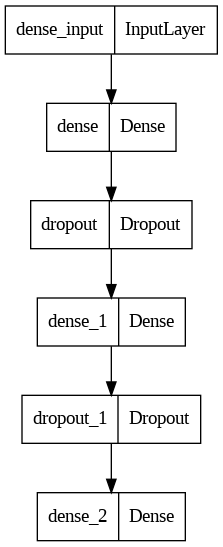

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
#from  keras import layers
model = tf.keras.Sequential([
    keras.layers.Dense(units=16, activation='relu', input_shape=dc_dataset.X.shape[1:]),#(8,16,32,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu'), #(8,16,64,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1),
])
from tensorflow import keras
keras.utils.plot_model(model)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                134416    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 134,993
Trainable params: 134,993
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                134416    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 134,993
Trainable params: 134,993
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
151/151 [=========================

<AxesSubplot:>

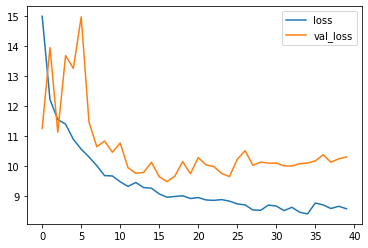

In [ ]:
print(model.summary())
lr = 0.05
epo = 40
model.compile(loss='mae', optimizer= Adam(learning_rate = lr))

history = model.fit(
    train.X, train.y,
    validation_data=(test.X,test.y),
    batch_size=100,
    epochs=epo,
    verbose = 1
)

## perform a plot of loss vs epochs 
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

### Experiment 02 - Architecture 02

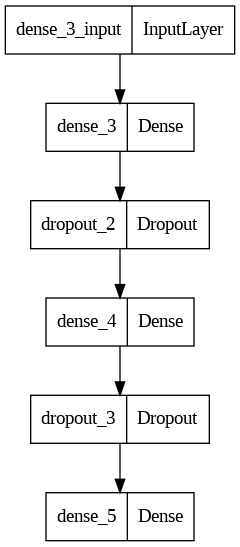

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
#from  keras import layers
model = tf.keras.Sequential([
    keras.layers.Dense(units=256, activation='relu', input_shape=dc_dataset.X.shape[1:]),#(8,16,32,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=256, activation='relu'), #(8,16,64,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1),
])
from tensorflow import keras
keras.utils.plot_model(model)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               2150656   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,216,705
Trainable params: 2,216,705
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
151/151 [===================

<AxesSubplot:>

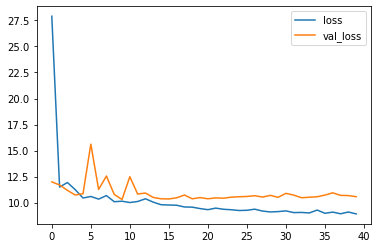

In [ ]:
print(model.summary())
lr = 0.05
epo = 40
model.compile(loss='mae', optimizer= Adam(learning_rate = lr))

history = model.fit(
    train.X, train.y,
    validation_data=(test.X,test.y),
    batch_size=100,
    epochs=epo,
    verbose = 1
)

## perform a plot of loss vs epochs 
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

### Experiment 03 - Architecture 03

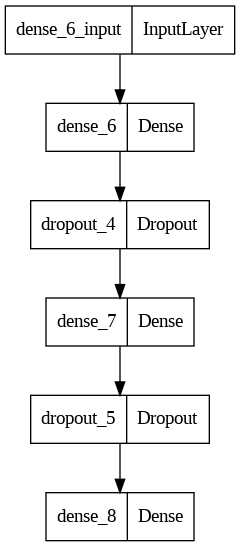

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
#from  keras import layers
model = tf.keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_shape=dc_dataset.X.shape[1:]),#(8,16,32,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation='relu'), #(8,16,64,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1),
])
from tensorflow import keras
keras.utils.plot_model(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1075328   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,091,969
Trainable params: 1,091,969
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
151/151 [===================

<AxesSubplot:>

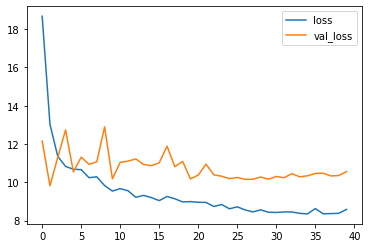

In [ ]:
print(model.summary())
lr = 0.05
epo = 40
model.compile(loss='mae', optimizer= Adam(learning_rate = lr))

history = model.fit(
    train.X, train.y,
    validation_data=(test.X,test.y),
    batch_size=100,
    epochs=epo,
    verbose = 1
)

## perform a plot of loss vs epochs 
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

### Experiment 04 - Architecture 04

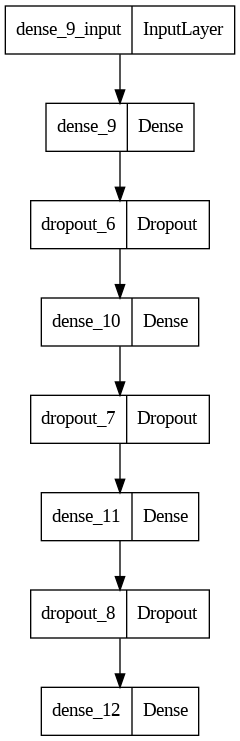

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
#from  keras import layers
model = tf.keras.Sequential([
    keras.layers.Dense(units=16, activation='relu', input_shape=dc_dataset.X.shape[1:]),#(8,16,32,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu'), #(8,16,64,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1),
])
from tensorflow import keras
keras.utils.plot_model(model)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                134416    
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                

<AxesSubplot:>

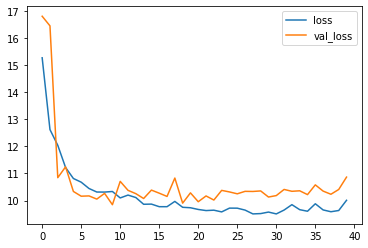

In [ ]:
print(model.summary())
lr = 0.05
epo = 40
model.compile(loss='mae', optimizer= Adam(learning_rate = lr))

history = model.fit(
    train.X, train.y,
    validation_data=(test.X,test.y),
    batch_size=100,
    epochs=epo,
    verbose = 1
)

## perform a plot of loss vs epochs 
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

### Experiment 05 - Architectur 05

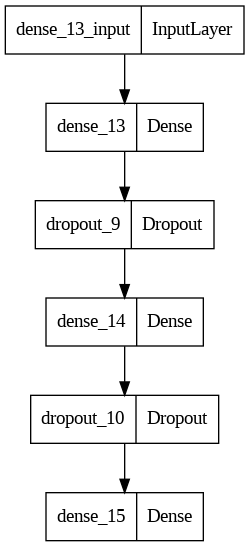

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
#from  keras import layers
model = tf.keras.Sequential([
    keras.layers.Dense(units=8, activation='relu', input_shape=dc_dataset.X.shape[1:]),#(8,16,32,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=16, activation='relu'), #(8,16,64,128)
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1),
])
from tensorflow import keras
keras.utils.plot_model(model)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 67208     
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 16)                144       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 67,369
Trainable params: 67,369
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
151/151 [=========================

<AxesSubplot:>

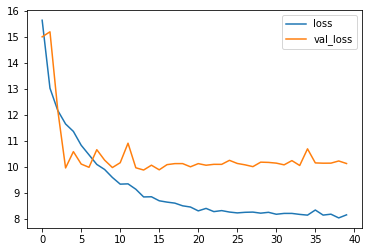

In [ ]:
print(model.summary())
lr = 0.05
epo = 40
model.compile(loss='mae', optimizer= Adam(learning_rate = lr))

history = model.fit(
    train.X, train.y,
    validation_data=(test.X,test.y),
    batch_size=100,
    epochs=epo,
    verbose = 1
)

## perform a plot of loss vs epochs 
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

## Hyper Parameter Tuning

In [ ]:
# epochs = [20,30,40]
# learning_rate = [0.00001,0.0001,0.0005,0.001,0.005,0.01,0.05]
# min_loss = []
# min_valloss = []
# all_loss = []
# all_valloss = []


# for epo in epochs:
#   for lr in learning_rate:
#     model.compile(loss='mae', optimizer= Adam(learning_rate = lr))
#     print(f"Number of epochs: {epo} & Learning_rate: {lr}")
#     history = model.fit(
#         train.X, train.y,
#         validation_data=(test.X,test.y),
#         batch_size=100,
#         epochs=epo,
#         verbose = 1
#     )
#     history_df = pd.DataFrame(history.history)
#     min_loss.append(history_df['loss'].min())
#     min_valloss.append(history_df['val_loss'].min())
#   all_loss.append(min_loss)
#   all_valloss.append(min_valloss)
#   min_loss = []
#   min_valloss = []


In [ ]:
# #loss values
# import matplotlib.pyplot as plt

# plt.figure(figsize = (8,8))
# for index in range(len(epochs)):
#   plt.plot(learning_rate,all_loss[index], label = f"epochs {epochs[index]}")
# plt.xlabel("Learning Rate")
# plt.ylabel("Loss")
# plt.title("Loss values with learning rate with respective to the number of epochs")
# plt.legend(loc = "best")
# plt.xscale("log")
# plt.grid(True)
# plt.show()

In [ ]:
# #val loss values
# import matplotlib.pyplot as plt

# plt.figure(figsize = (8,8))
# for index in range(len(epochs)):
#   plt.plot(learning_rate,all_valloss[index], label = f"epochs {epochs[index]}")
# plt.xlabel("Learning Rate")
# plt.ylabel("Validation Loss")
# plt.title("Validation Loss values with learning rate with respective to the number of epochs")
# plt.legend(loc = "best")
# plt.xscale("log")
# plt.grid(True)
# plt.show()